Objective of this notebook is to understand RMSE, MAE metrics and R2 score in a Regression Model <br/>

For this purpose, we are considering a simple problem of predicting salary of a data scientist based on the number of years of experience. <br/>
Salary is the target variable (Y) and experience is the independent variable(X). 

We have some random data on experience(X) and salary(Y). Here are the steps that we will follow. 
 1. Create a Linear Regression model to predict salary. 
 2. Evaluate these models using RMSE, MAE and R2 scores. 
 3. Create visualizations for these metrics and Understand mathematical formula to compute them.

In [55]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


**Data Loading**

Loading data into a table

In [56]:
sal_data={"Exp":[2,2.2, 2.8, 4, 7, 8, 11, 12, 21, 25], 
          "Salary": [7, 8, 11, 15, 22, 29, 37 ,45.7, 49, 52]}

#Load data into a pandas Dataframe
df=pd.DataFrame(sal_data)
df.head(3)

,Exp,Salary
0,2.0,7.0
1,2.2,8.0
2,2.8,11.0


**Model Development**

Let's create Simple Linear Regression Model to predict salaries.

In [57]:
#Selecting X and y variables

X=df[['Exp']]
y=df.Salary

#Create a Simple Linear Regression Model to predict salaries

lm=LinearRegression()
lm.fit(X,y)

#Prediction of salaries by the model
ypred=lm.predict(X)
print(ypred)


[12.23965934 12.64846842 13.87489568 16.32775018 22.45988645 24.50393187
 30.63606813 32.68011355 51.07652234 59.25270403]


**Data Visualization**

Plotting predicted vs actual Salary using bokeh 

In [58]:
from bokeh.plotting import figure, show, output_notebook
output_notebook()

p = figure(title = "Actual vs Predicted Salary ", width=450, height=300)
p.title.align = 'center'
p.circle(df.Exp, df.Salary)
p.line(df.Exp, df.Salary, legend_label='Actual Salary', line_width=3, line_alpha=0.4)
p.circle(df.Exp, ypred, color="red")
p.line(df.Exp,ypred, color="red",legend_label='Predicted Salary', line_width=3, line_alpha=0.4)

p.xaxis.axis_label = 'Experience'
p.yaxis.axis_label = 'Salary'

show(p)

Loading BokehJS ...

Plotting residual plot using bokeh

In [59]:
residuals=np.array(y)-np.array(ypred)
print(residuals)

p=figure(title="Salary Residual plot", width=400, height=300)
p.title.align = 'center'
p.circle(df.Exp, residuals)

p.xgrid[0].grid_line_color=None
p.ygrid[0].grid_line_alpha=0.7

show(p)

[-5.23965934 -4.64846842 -2.87489568 -1.32775018 -0.45988645  4.49606813
  6.36393187 13.01988645 -2.07652234 -7.25270403]


**Model Evaluation**

Computing MAE and RMSE metrics:

In [60]:
#RMSE
np.sqrt(np.mean(np.square(y-ypred)))

#using sklearn library
np.sqrt(mean_squared_error(y, ypred))

5.885975631069267

In [61]:
#MAE
np.mean(abs(y-ypred))

#using sklearn
mean_absolute_error(y, ypred)

4.775977289351772

R2 score

In [62]:
a=sum(np.square(residuals))
b=sum(np.square(y-np.mean(y)))
1-(a/b)

0.873810039518091

**Polynomial Transformation to improve the model**

In [63]:
from sklearn.preprocessing import PolynomialFeatures
p=PolynomialFeatures()
X_poly=p.fit_transform(X)

lm.fit(X_poly, y)
ypred=lm.predict(X_poly)
ypred

array([ 6.66607844,  7.55269321, 10.15971332, 15.13604469, 26.19023821,
       29.43476783, 37.84775199, 40.21187849, 51.58448186, 50.91635197])

**Plotting predicted vs actual Salary**

In [64]:
p = figure(title = "Actual vs Predicted Y values ", width=450, height=300)
p.title.align = 'center'
p.circle(df.Exp, df.Salary, legend_label='Actual Salary',)
p.line(df.Exp, df.Salary, legend_label='Actual Salary', line_width=3, line_alpha=0.4)
p.circle(df.Exp, ypred, legend_label='Predicted Salary', color="red")
p.line(df.Exp,ypred, color="red",legend_label='Predicted Salary', line_width=3, line_alpha=0.4)
p.xaxis.axis_label = 'Experience'
p.yaxis.axis_label = 'Salary'
show(p)

In [65]:
#RMSE and MAE
np.sqrt(np.mean(np.square(y-ypred))), np.mean(abs(y-ypred))


(2.397400610674868, 1.638656916224218)

In [66]:
#R2 score
sum_of_square_of_residuals=sum(np.square(residuals))
var2=sum(np.square(y-np.mean(y)))
1-(sum_of_square_of_residuals/var2)

0.873810039518091

Residual Plot using seaborn

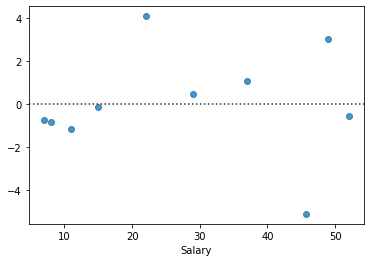

In [67]:
import seaborn as sns
sns.residplot(y, ypred)
plt.show()

Residual Plot using bokeh

In [68]:
residuals=np.array(y)-np.array(ypred)
residuals

p=figure(title="Salary Residual plot", width=400, height=300)
p.title.align = 'center'
p.circle(df.Exp, residuals)

#p.xaxis.axis_label = "Temp"
#p.xaxis.axis_line_width = 2
#p.xaxis.axis_line_color = "black"

p.xgrid[0].grid_line_color=None
p.ygrid[0].grid_line_alpha=0.7

show(p)